In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
um = pd.read_csv("/Users/erinmurphy/Desktop/Adv Projects in Viz/Final project/State_Union_Membership_Density_2008-2022.csv")

um.head()

,state_id,state,year,mem_pct
0,―,All States,2022,10.1
1,63,Alabama,2022,7.2
2,94,Alaska,2022,16.0
3,86,Arizona,2022,5.5
4,71,Arkansas,2022,4.9


In [12]:
um.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 780 entries, 0 to 779
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   state_id  780 non-null    object 
 1   state     780 non-null    object 
 2   year      780 non-null    int64  
 3   mem_pct   780 non-null    float64
dtypes: float64(1), int64(1), object(2)
memory usage: 24.5+ KB


In [13]:
um.describe()

,year,mem_pct
count,780.000000,780.000000
mean,2015.000000,10.392179
std,4.323266,5.167083
min,2008.000000,1.600000
25%,2011.000000,5.800000
50%,2015.000000,9.850000
75%,2019.000000,14.100000
max,2022.000000,25.200000


In [14]:
um.shape

(780, 4)

In [19]:
um.groupby(['year']).groups.keys()
g_year= um.groupby(['year'])['mem_pct'].mean()
g_year_df= pd.DataFrame(g_year)
g_year_df['year'] = g_year_df.index


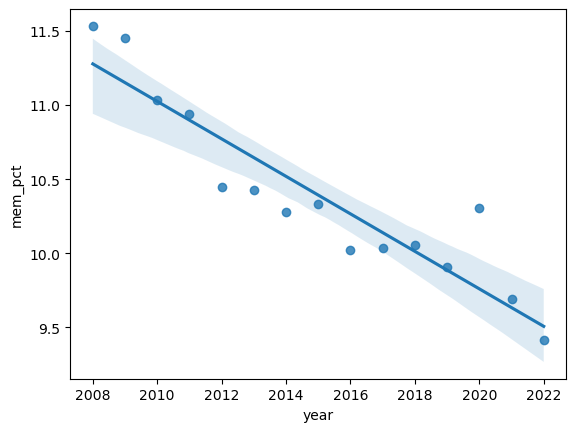

In [20]:
ax = sns.regplot(x=g_year_df['year'], y=g_year_df['mem_pct'])

In [21]:
g_state = um.groupby(['state'])['mem_pct'].mean()
g_state_df= pd.DataFrame(g_state)
g_state_df['state'] = g_state_df.index

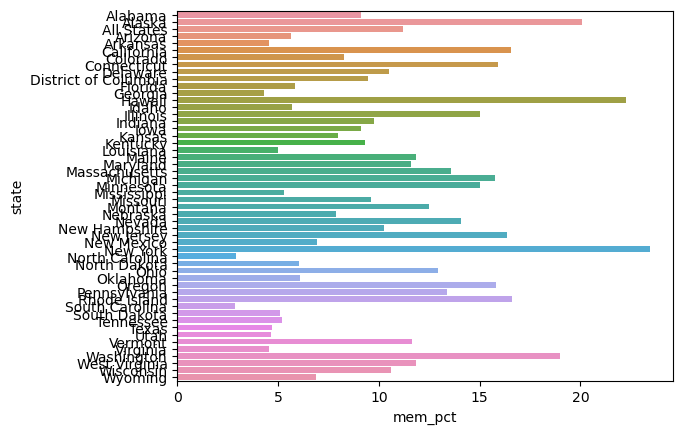

In [22]:
ax = sns.barplot(x="mem_pct", y="state", data=g_state_df)

In [37]:
g_state_yr = um.groupby(['state'])['mem_pct'].mean()
g_state_yr_df= pd.DataFrame(g_state_yr)
g_state_yr_df['state'] = g_state_yr_df.index

In [36]:
g_state_df.head()

,mem_pct,state
state,,
Alabama,9.120000,Alabama
Alaska,20.066667,Alaska
All States,11.173333,All States
Arizona,5.626667,Arizona
Arkansas,4.546667,Arkansas


<AxesSubplot: xlabel='state', ylabel='mem_pct'>

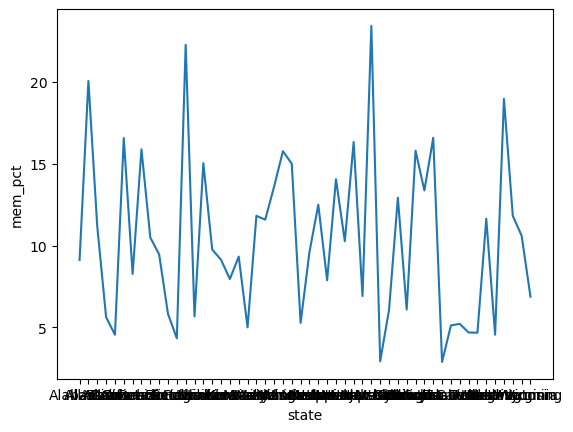

In [39]:
sns.lineplot(data=g_state_yr_df, x="state", y="mem_pct")
##sns.lineplot(x=g_year_df['year'], y=g_state_df['mem_pct'], hue=g_state_df["state"], style=g_state_df["state"])
## ax = sns.regplot(x=g_year_df['year'], y=g_year_df['mem_pct'])

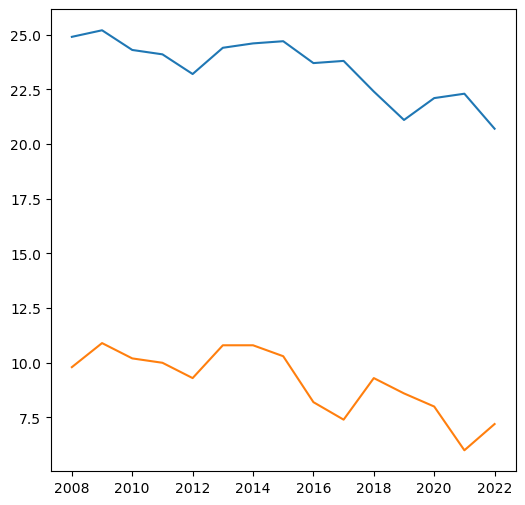

In [41]:
fig2, ax = plt.subplots(figsize=(6,6))
ax.plot(um[um.state=='New York'].groupby('year').mem_pct.mean(), label='New York')
ax.plot(um[um.state=='Alabama'].groupby('year').mem_pct.mean(), label='Alabama')

In [45]:
mem_time = [ um['state'].isin(g_state_df['state']) ].copy()

sns.lineplot(
    data = mem_time,
    x = 'year', y = 'mem_pct',
    hue = 'state')

plt.title( "mem by state" )
sns.despine( left = True )
plt.tick_params( left = False )
plt.grid( axis = 'y', lw = 0.5, ls = '--')
plt.xlabel('')
plt.ylabel('mem pct')
plt.legend(bbox_to_anchor=(1,1), loc="upper left")

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().